In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
import time
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report , confusion_matrix ,f1_score,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier , RandomForestClassifier , StackingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
import scipy.stats as stats
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [48]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Our Data has:

26 integer variables
9 object variables

#Statistical Exploration
Get descriptive statistics for the numeric variables

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see that no missing values exist in dataset, that's great!

# EDA

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64


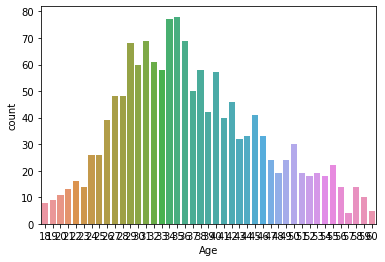

In [20]:
ax=sns.countplot(x="Age",data=df)
print(df['Age'])

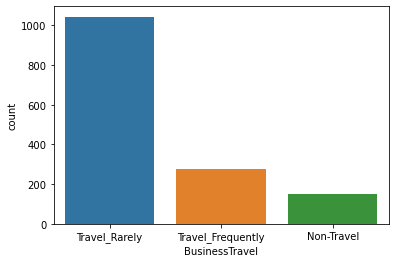

In [21]:
ax=sns.countplot(x="BusinessTravel",data=df)
plt.show()

We saw that the highest number of count is for travel rearly. Non Travel is very low.

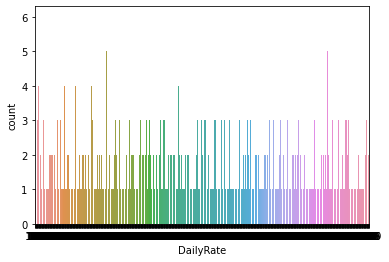

In [22]:
ax=sns.countplot(x="DailyRate",data=df)
plt.show()

There is a normal distribution in DailyRates between 0 to 4.

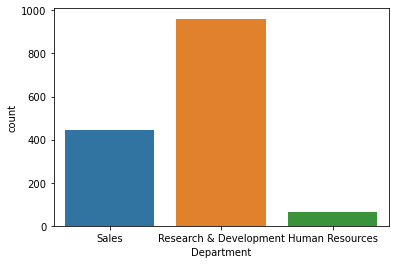

In [26]:
ax=sns.countplot(x="Department",data=df)
plt.show()

Research and Development Department has highest number of count.

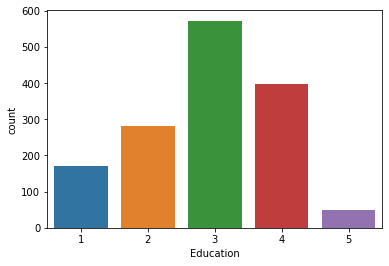

In [27]:
ax=sns.countplot(x="Education",data=df)
plt.show()

Highest Education number is 3.

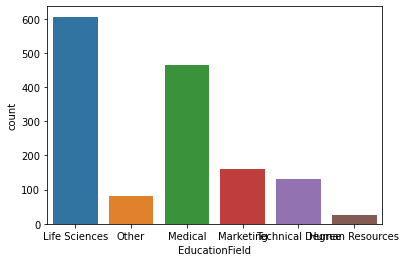

In [28]:
ax=sns.countplot(x="EducationField",data=df)
plt.show()

Most of the people are from Life science and Medical

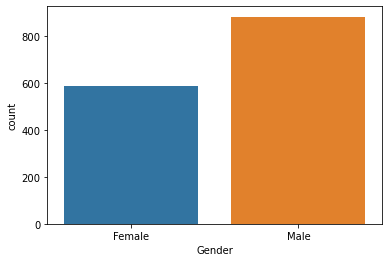

In [29]:
ax=sns.countplot(x="Gender",data=df)
plt.show()

Male employee are more than Female employee.

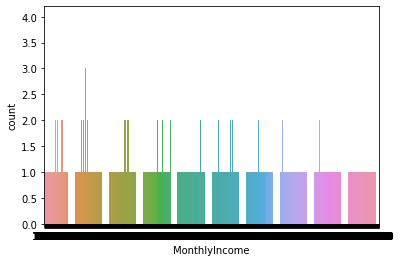

In [30]:
ax=sns.countplot(x="MonthlyIncome",data=df)
plt.show()

All are having income between 0 to 10,000.

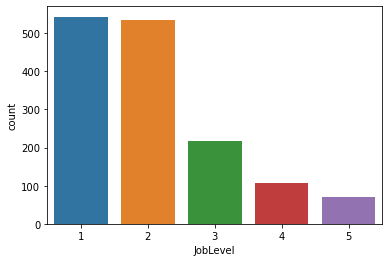

In [31]:
ax=sns.countplot(x="JobLevel",data=df)
plt.show()

Most of the employee's Job level is 1 and 2.

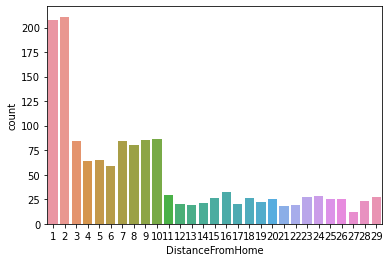

In [32]:
ax=sns.countplot(x="DistanceFromHome",data=df)
plt.show()

Most of the employee come from 1 to 10 km.

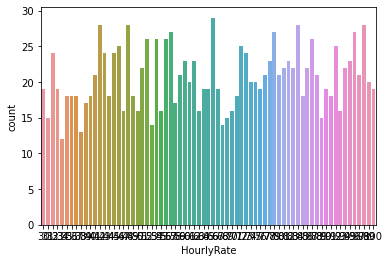

In [33]:
ax=sns.countplot(x="HourlyRate",data=df)
plt.show()

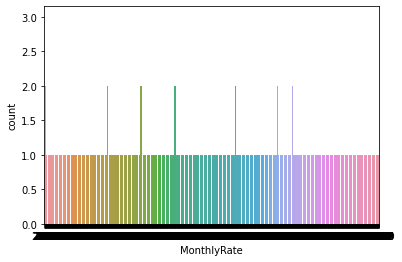

In [34]:
ax=sns.countplot(x="MonthlyRate",data=df)
plt.show()

Monthly rate is between 0 to 10,000.

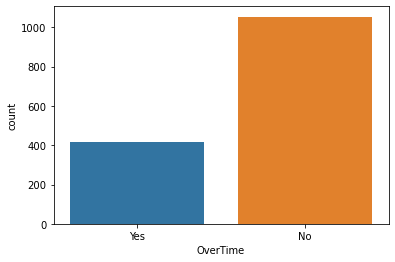

In [37]:
ax=sns.countplot(x="OverTime",data=df)
plt.show()

Most of the employee never do overtime.

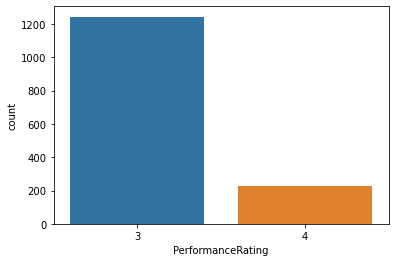

In [39]:
ax=sns.countplot(x="PerformanceRating",data=df)
plt.show()

Most of the employee get 3 rating.

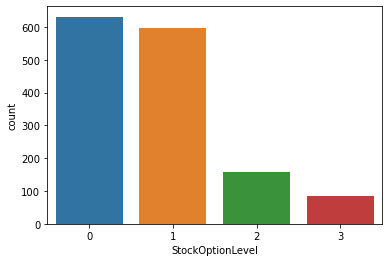

In [40]:
ax=sns.countplot(x="StockOptionLevel",data=df)
plt.show()

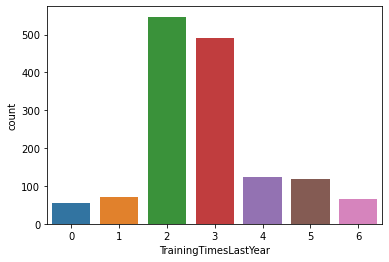

In [41]:
ax=sns.countplot(x="TrainingTimesLastYear",data=df)
plt.show()

Most of the employee take training for 2 to 3 hours.

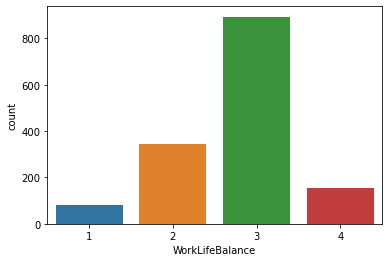

In [42]:
ax=sns.countplot(x="WorkLifeBalance",data=df)
plt.show()

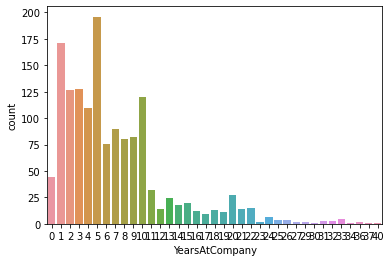

In [44]:
ax=sns.countplot(x="YearsAtCompany",data=df)
plt.show()

Most of the employee's are from 0 to 10 years in company.

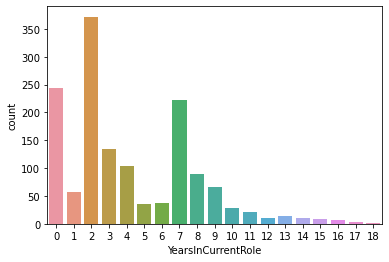

In [45]:
ax=sns.countplot(x="YearsInCurrentRole",data=df)
plt.show()

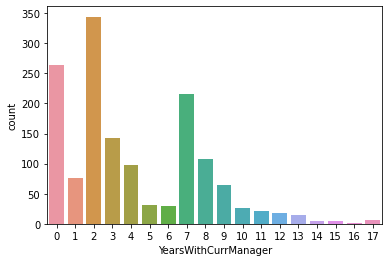

In [47]:
ax=sns.countplot(x="YearsWithCurrManager",data=df)
plt.show()

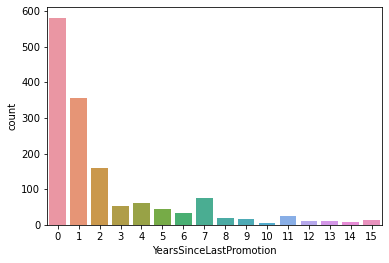

In [46]:
ax=sns.countplot(x="YearsSinceLastPromotion",data=df)
plt.show()

# Skewness

In [7]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

The concerning Variables are:

JobLevel
MonthlyIncome
NumCompaniesWorked
PerformanceRating
TotalWorkingYears
YearsAtCompany
YearsSinceLastPromotion

In [8]:
skew=('JobLevel','MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','DistanceFromHome')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [9]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.207708
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     0.718805
YearsWithCurrManager        0.833451
dtype: float64

In [10]:
df.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'], axis = 1, inplace = True)

# LabelEncoder

In [11]:
le=LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,0.693147,2,1,2,0,...,1.386294,1,0.000000,2.197225,0,1,1.945910,4,0.000000,5
1,49,0,1,279,1,2.197225,1,1,3,1,...,1.609438,4,0.693147,2.397895,3,3,2.397895,7,0.693147,7
2,37,1,2,1373,1,1.098612,2,4,4,1,...,1.386294,2,0.000000,2.079442,3,3,0.000000,0,0.000000,0
3,33,0,1,1392,1,1.386294,4,1,4,0,...,1.386294,3,0.000000,2.197225,3,3,2.197225,7,1.386294,0
4,27,0,2,591,1,1.098612,1,3,1,1,...,1.386294,4,0.693147,1.945910,3,3,1.098612,2,1.098612,2


# OUTLIERS

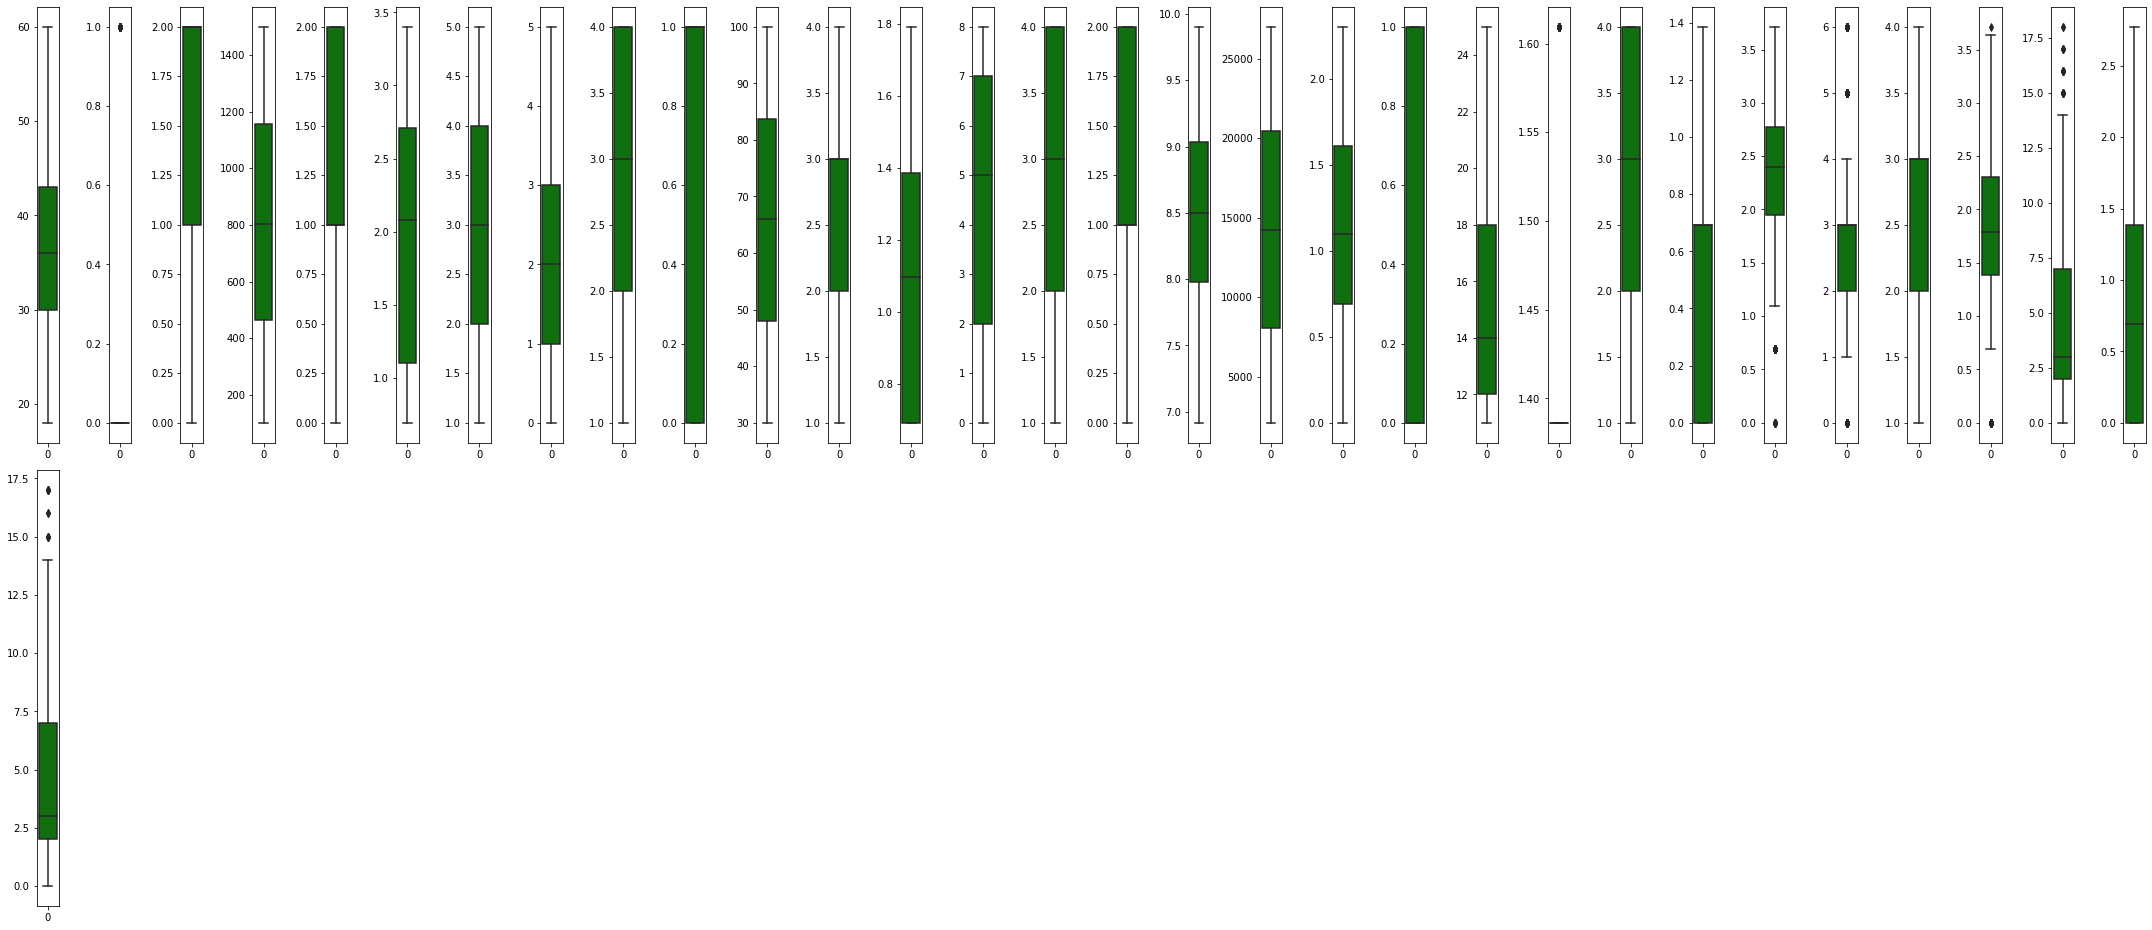

In [12]:
import seaborn as sns
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= df[collist[i]],color='green',orient='v')
    plt.tight_layout()

we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.

So now we detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are find the IQR, zscore values

In [13]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(1470, 31)

In [14]:
threshold=3
print(np.where(z>3))

(array([  23,   28,   63,  123,  123,  127,  153,  187,  190,  231,  231,
        281,  296,  301,  386,  457,  466,  561,  615,  616,  635,  686,
        716,  727,  746,  828,  875,  926,  972,  976, 1024, 1078, 1153,
       1311, 1327, 1348, 1351, 1430], dtype=int64), array([24, 30, 28, 28, 30, 24, 30, 30, 28, 28, 30, 28, 24, 24, 30, 24, 28,
       30, 24, 30, 30, 30, 28, 24, 28, 24, 30, 30, 24, 28, 28, 30, 24, 24,
       28, 30, 28, 28], dtype=int64))


In [15]:
len(np.where(z>3)[0])

38

In [16]:
df_new=df.drop([23,   28,   63,  123,  123,  127,  153,  187,  190,  231,  231,
        281,  296,  301,  386,  457,  466,  561,  615,  616,  635,  686,
        716,  727,  746,  828,  875,  926,  972,  976, 1024, 1078, 1153,
       1311, 1327, 1348, 1351, 1430 ],axis=0)

In [17]:
df_new.shape

(1434, 31)

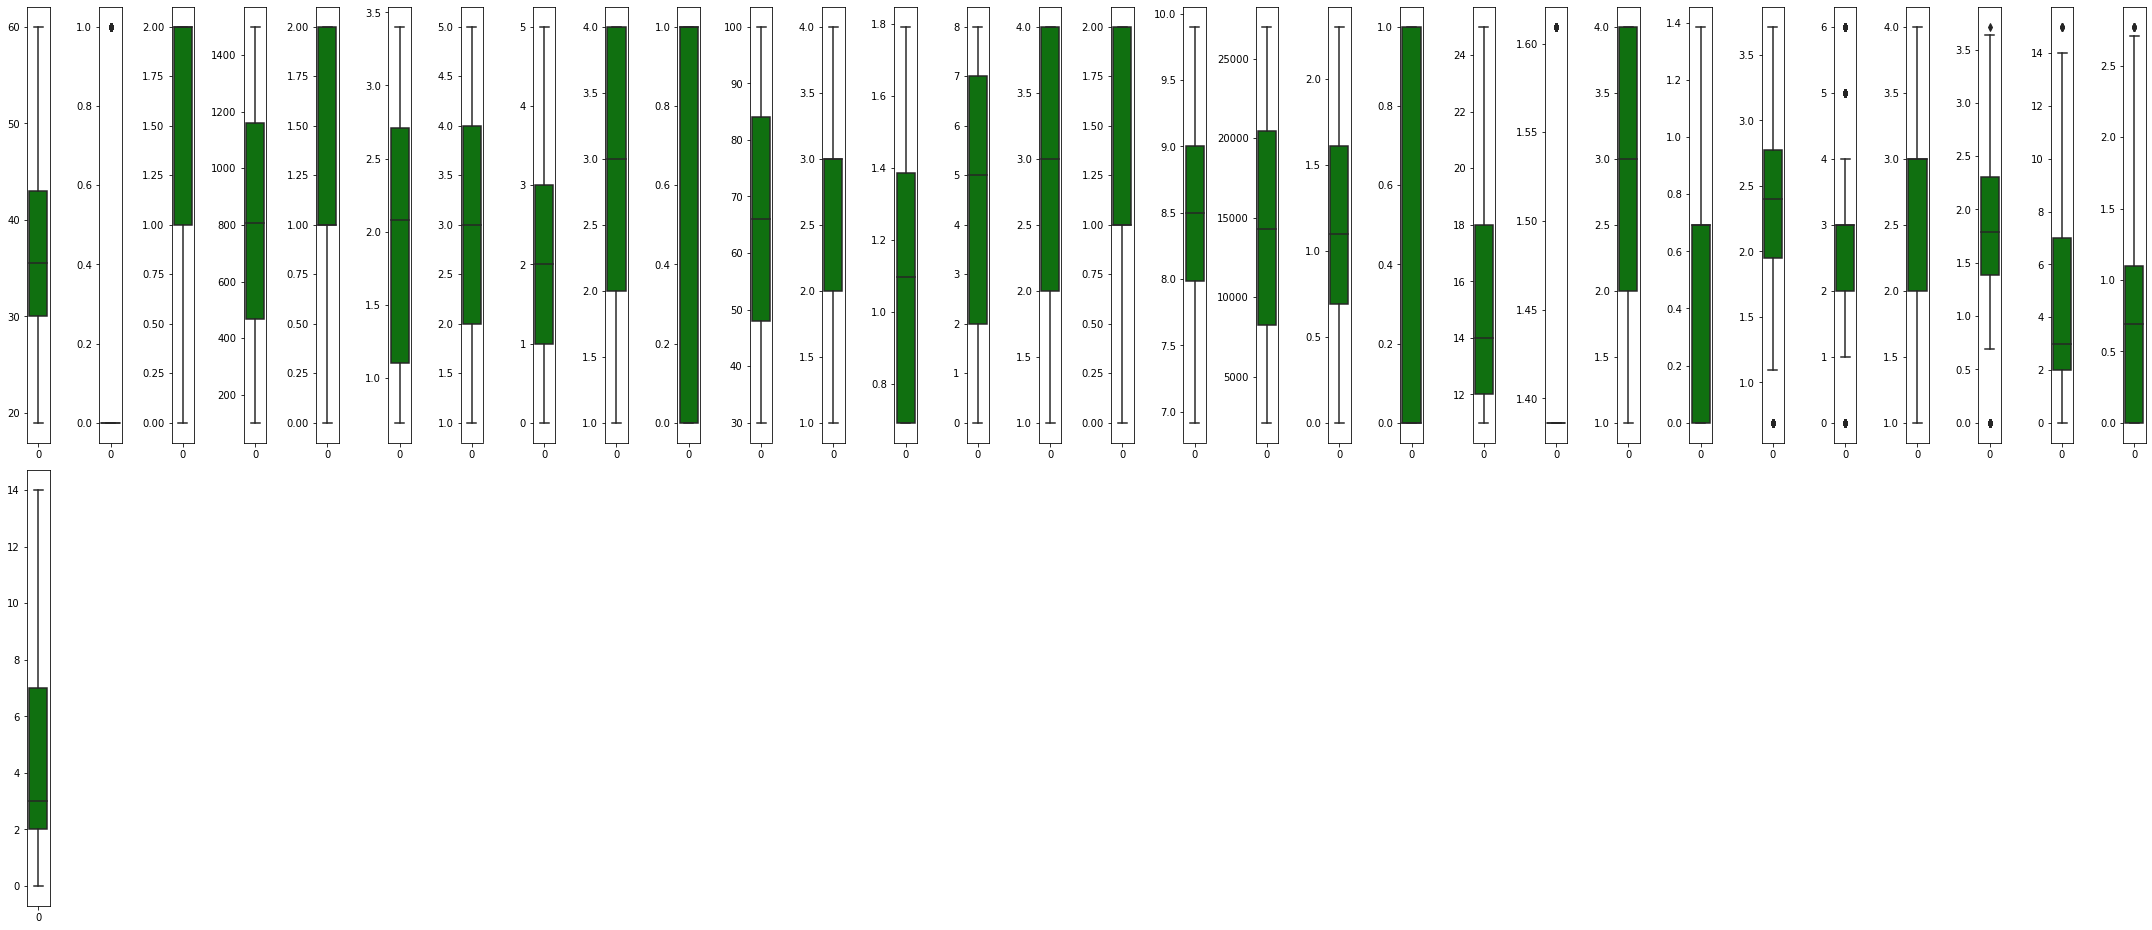

In [18]:
import seaborn as sns
collist=df_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [24]:
df=df_new

I first find the zscore value and then I decide to make one threshold value as 3 which is standard of industry recommend value and then I remove all the outliers which zscore value is greater than 3.
After, removing the outlier’s final there are 1434 and 31 column presents in the data set.

# CORRELATION

<AxesSubplot:>

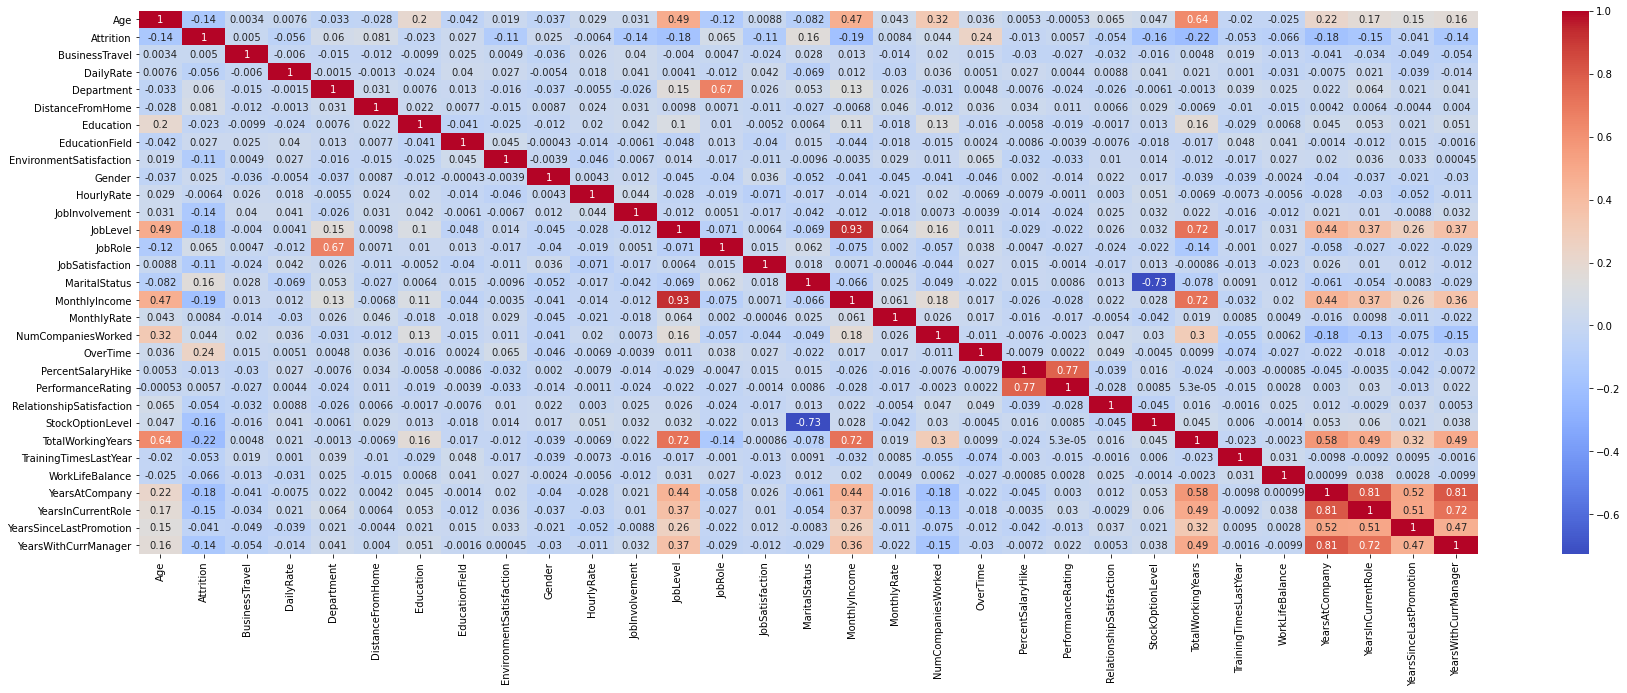

In [27]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [19]:
x = df.drop(columns = ['Attrition'],axis=1)
y = df['Attrition']

# Scalling the data using Min-Max Scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
maxAcc=0
MaxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        MaxRs=i
print("Best Accuracy is",maxAcc,"on random state", MaxRs)
    

Best Accuracy is 0.8786008230452675 on random state 26


We saw that we get 87% accuracy at random state 26

In [26]:
def models(x_train, y_train):
    from sklearn.linear_model import LogisticRegression

    log = LogisticRegression(random_state = 26)
    log.fit(x_train, y_train)

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p =2)
    knn.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 26)
    svc_lin.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 26)
    svc_rbf.fit(x_train, y_train)

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state =26 )
    tree.fit(x_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=26)
    forest.fit(x_train,y_train)

    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Classsifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [27]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8577235772357723
[1]K Nearest Neighbor Training Accuracy: 0.850609756097561
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8516260162601627
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8414634146341463
[4]Gaussian Naive Bayes Training Accuracy: 0.8150406504065041
[5]Decision Tree Classsifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9745934959349594


# Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))
    
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i, (TP + TN) / (TP + TN + FN +FP)))
    cr=classification_report(y_test,model[i].predict(x_test))
    print(cr)
    print('\n')

[[403   2]
 [ 77   4]]
Model[0] Testing Accuracy = "0.8374485596707819 !"
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       405
           1       0.67      0.05      0.09        81

    accuracy                           0.84       486
   macro avg       0.75      0.52      0.50       486
weighted avg       0.81      0.84      0.77       486



[[400   5]
 [ 77   4]]
Model[1] Testing Accuracy = "0.831275720164609 !"
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       405
           1       0.44      0.05      0.09        81

    accuracy                           0.83       486
   macro avg       0.64      0.52      0.50       486
weighted avg       0.77      0.83      0.77       486



[[400   5]
 [ 73   8]]
Model[2] Testing Accuracy = "0.8395061728395061 !"
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       405
           1

# Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("cross validation score of LR is:",scr.mean())

cross validation score of LR is: 0.846938775510204


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of Random Forest Classifier is:",scr.mean())

cross validation score of Random Forest Classifier is: 0.8578231292517007


In [31]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
scr=cross_val_score(dt,x,y,cv=5)
print("cross validation score of Decision Tree Classifieris:",scr.mean())

cross validation score of Decision Tree Classifieris: 0.7836734693877551


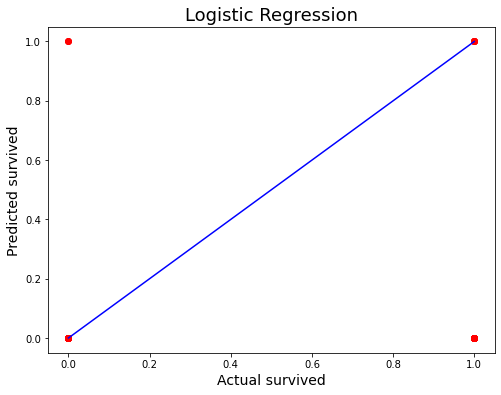

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual survived',fontsize=14)
plt.ylabel('Predicted survived',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Hyper Tunning Parameter

In [33]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [34]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [35]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8600823045267489

# AUC-ROC Curve

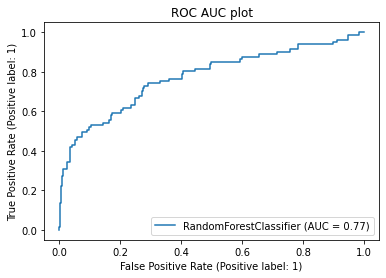

In [36]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# Conclusion

In [52]:
import pickle
filename='HR_Analysis.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

In [53]:
import pickle
loaded_model=pickle.load(open('HR_Analysis.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.0082304526749


In [54]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],GCV_pred[:]],index=["Predicted","original"])

In [55]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,476,477,478,479,480,481,482,483,484,485
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
original,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
